In [1]:
import accelerator_environments
from accelerator_environments.wrappers import NormalizeObservation
import gym
import matplotlib.pyplot as plt
import numpy as np
from stable_baselines3 import TD3

In [2]:
env = gym.make("ARESEA-JOSS-v0")
env = NormalizeObservation(env)
env = gym.wrappers.Monitor(env, "recordings", video_callable=lambda _: True, force=True)

initializing ocelot...
/usr/local/lib/python3.8/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


In [3]:
model = TD3.load("model_zoo_parameters_fluent-water-2571.zip")

In [5]:
observation = env.reset()

image_before = env.render()
observations = [observation]
rewards = [0]

done = False
while not done:
    action, _ = model.predict(observation, deterministic=True)
    observation, reward, done, info = env.step(action)

    observations.append(observation)
    rewards.append(reward)

image_after = env.render()

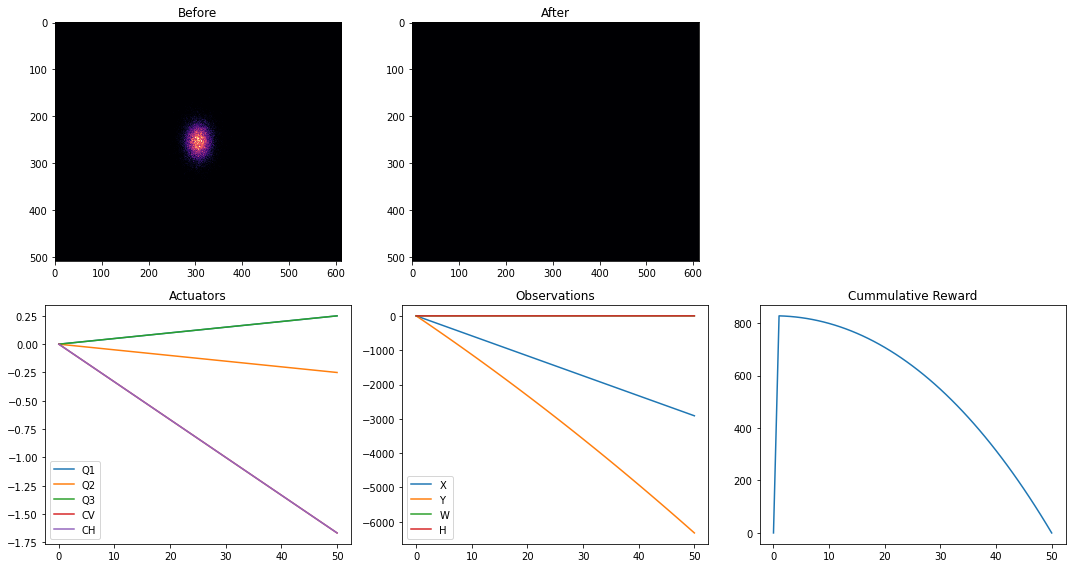

In [6]:
observations = np.array(observations)
cummulative_rewards = [sum(rewards[:i+1]) for i in range(len(rewards))]

plt.figure(figsize=(15,8))

plt.subplot(231)
plt.title("Before")
plt.imshow(image_before, interpolation="None")

plt.subplot(232)
plt.title("After")
plt.imshow(image_after, interpolation="None")

plt.subplot(234)
plt.title("Actuators")
plt.plot(observations[:,4], label="Q1")
plt.plot(observations[:,5], label="Q2")
plt.plot(observations[:,6], label="Q3")
plt.plot(observations[:,7], label="CV")
plt.plot(observations[:,8], label="CH")
plt.legend()

plt.subplot(235)
plt.title("Observations")
plt.plot(observations[:,0], label="X")
plt.plot(observations[:,1], label="Y")
plt.plot(observations[:,2], label="W")
plt.plot(observations[:,3], label="H")
plt.legend()

plt.subplot(236)
plt.title("Cummulative Reward")
plt.plot(cummulative_rewards)

plt.tight_layout()
plt.show()